# (A3.1 SVM y Multiple Testing)         
                                                                                                       
                                                                            Fernando Ariel Lozano Castillo

# 1
Importá los datos a tu ambiente de trabajo y revisa que no haya huecos.

In [19]:
# Importa la librería pandas
import pandas as pd
# Lee el archivo
df = pd.read_csv("A3.1 Khan.csv")

print(df.isnull().values.any())  # Devuelve True si hay al menos un valor nulo

display(df.head(5))

False


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X2300,X2301,X2302,X2303,X2304,X2305,X2306,X2307,X2308,y
0,0.773344,-2.438405,-0.482562,-2.721135,-1.217058,0.827809,1.342604,0.057042,0.133569,0.565427,...,-0.027474,-1.660205,0.588231,-0.463624,-3.952845,-5.496768,-1.414282,-0.647600,-1.763172,2
1,-0.078178,-2.415754,0.412772,-2.825146,-0.626236,0.054488,1.429498,-0.120249,0.456792,0.159053,...,-0.246284,-0.836325,-0.571284,0.034788,-2.478130,-3.661264,-1.093923,-1.209320,-0.824395,2
2,-0.084469,-1.649739,-0.241308,-2.875286,-0.889405,-0.027474,1.159300,0.015676,0.191942,0.496585,...,0.024985,-1.059872,-0.403767,-0.678653,-2.939352,-2.736450,-1.965399,-0.805868,-1.139434,2
3,0.965614,-2.380547,0.625297,-1.741256,-0.845366,0.949687,1.093801,0.819736,-0.284620,0.994732,...,0.357115,-1.893128,0.255107,0.163309,-1.021929,-2.077843,-1.127629,0.331531,-2.179483,2
4,0.075664,-1.728785,0.852626,0.272695,-1.841370,0.327936,1.251219,0.771450,0.030917,0.278313,...,0.061753,-2.273998,-0.039365,0.368801,-2.566551,-1.675044,-1.082050,-0.965218,-1.836966,2


Calcula la diferencia de promedios entre las clases 2 y 4 para todos los genes.

In [20]:
df_clase_2 = df[df["y"] == 2]
df_clase_4 = df[df["y"] == 4]

# Seleccionar solo las columnas de genes (excluyendo la columna "y")
genes = df.columns.difference(["y"])

# Calcular la diferencia absoluta de medias
diferencias = (df_clase_2[genes].mean() - df_clase_4[genes].mean()).abs()

# Ordenar de mayor a menor y mostrar los 10 genes con mayor diferencia
top_10_diferencias = diferencias.sort_values(ascending=False).head(10)

print("Top 10 genes con mayor diferencia de medias entre clase 2 y clase 4:")
print(top_10_diferencias)

Top 10 genes con mayor diferencia de medias entre clase 2 y clase 4:
X187     3.323151
X509     2.906537
X2046    2.424515
X2050    2.401783
X129     2.165185
X1645    2.065460
X1319    2.045941
X1955    2.037340
X1003    2.011337
X246     1.837830
dtype: float64


#### Indica qué crees que esta diferencia podría implicar en términos de un estudio de inferencia.


Una alta diferencia de promedios podrían significar que  están implicados en las diferencias entre esos tipos de cáncer.Osea estadísticamente significativas

# 2
Calcula el estadístico t y el p-value para comparar las medias de todos los genes entre la
clase 2 y la clase 4 de la base de datos. Usa la metodología de Bonferroni, de Holm, y de
Benjamini-Hochberg para corregir por múltiples pruebas e indica, para cada una, qué
genes tienen una expresión significativamente distinta entre las clases (maneja un control
de 0.05). Te recomiendo usar la función multipletests de statsmodels.stats.multitest

In [21]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests


# Aplicar t-test a cada gen
t_values = []
p_values = []

for gen in genes:
    t_stat, p_val = ttest_ind(df_clase_2[gen], df_clase_4[gen], equal_var=False)
    t_values.append(t_stat)
    p_values.append(p_val)

# Crear un DataFrame con resultados
resultados = pd.DataFrame({
    "Gen": genes,
    "T-stat": t_values,
    "P-value": p_values
})

# Correcciones por pruebas múltiples
# Bonferroni
_, p_bonf, _, _ = multipletests(resultados["P-value"], method="bonferroni", alpha=0.05)
# Holm
_, p_holm, _, _ = multipletests(resultados["P-value"], method="holm", alpha=0.05)
# Benjamini-Hochberg (FDR)
_, p_bh, _, _ = multipletests(resultados["P-value"], method="fdr_bh", alpha=0.05)

# Mostrar resultados
print("\nGenes significativos con Bonferroni:")
print(resultados[p_bonf < 0.05][["Gen", "P-value"]])

print("\nGenes significativos con Holm:")
print(resultados[p_holm < 0.05][["Gen", "P-value"]])

print("\nGenes significativos con Benjamini-Hochberg (FDR):")
print(resultados[p_bh < 0.05][["Gen", "P-value"]])


Genes significativos con Bonferroni:
        Gen       P-value
6     X1003  4.998692e-17
26    X1021  1.517061e-07
28    X1023  1.070352e-05
63    X1055  2.158065e-09
80    X1070  1.233061e-05
...     ...           ...
1992   X714  1.019715e-06
2045   X762  1.909656e-05
2210   X910  2.684648e-08
2255   X951  4.873710e-06
2277   X971  1.256136e-06

[72 rows x 2 columns]

Genes significativos con Holm:
        Gen       P-value
6     X1003  4.998692e-17
26    X1021  1.517061e-07
28    X1023  1.070352e-05
63    X1055  2.158065e-09
80    X1070  1.233061e-05
...     ...           ...
1992   X714  1.019715e-06
2045   X762  1.909656e-05
2210   X910  2.684648e-08
2255   X951  4.873710e-06
2277   X971  1.256136e-06

[72 rows x 2 columns]

Genes significativos con Benjamini-Hochberg (FDR):
        Gen       P-value
6     X1003  4.998692e-17
16    X1012  1.778278e-03
25    X1020  2.640410e-03
26    X1021  1.517061e-07
27    X1022  8.442182e-04
...     ...           ...
2269   X964  3.264171e-04


Bonferroni: Se encontraron genes con expresión significativamente distinta entre las clases 2 y 4, 
como **X1003, X1021, X1055** con p-values muy bajos.


Holm: Igual a Bonferroni. Se identificarona los genes **X1003, X1021, X1055**


Benjamini-Hochberg (FDR): Encontro genes  significativamente distintos entre las clases 2 y 4 y dos distintos con respecto a Bonferroni y Holm a 
**X1003, X1012, X1021, X1020**

# 3
Comparando las medias de las 4 clases de la
base de datos. Para lograrlo, en vez de trabajar con el estadístico t, te recomiendo realizar
pruebas de análisis de varianza (ANOVA).

In [22]:
from scipy.stats import f_oneway
# Separar los datos por clase
df_clase_1 = df[df["y"] == 1]
df_clase_2 = df[df["y"] == 2]
df_clase_3 = df[df["y"] == 3]
df_clase_4 = df[df["y"] == 4]


# Obtener los nombres de los genes (sin la columna 'y')
genes = df.columns.difference(["y"])

# Realizar ANOVA para cada gen
f_values = []
p_values = []

for gen in genes:
    # Estratificar las muestras por clase
    samples_clase_1 = df_clase_1[gen]
    samples_clase_2 = df_clase_2[gen]
    samples_clase_3 = df_clase_3[gen]
    samples_clase_4 = df_clase_4[gen]
    
    # Realizar la prueba ANOVA
    f_stat, p_val = f_oneway(samples_clase_1, samples_clase_2, samples_clase_3, samples_clase_4)
    
    f_values.append(f_stat)
    p_values.append(p_val)

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    "Gen": genes,
    "F-stat": f_values,
    "P-value": p_values
})

# Mostrar los genes y sus p-values
print("\nResultados de ANOVA entre clases:")
print(resultados)


Resultados de ANOVA entre clases:
        Gen     F-stat       P-value
0        X1  59.118264  3.839240e-20
1       X10   2.144041  1.012796e-01
2      X100   3.816154  1.311027e-02
3     X1000   4.313215  7.188560e-03
4     X1001   4.722667  4.399579e-03
...     ...        ...           ...
2303   X995   0.690618  5.604563e-01
2304   X996   1.128572  3.426672e-01
2305   X997   0.279305  8.401789e-01
2306   X998  11.990987  1.501783e-06
2307   X999   5.212021  2.459525e-03

[2308 rows x 3 columns]


Al observar los primeros 5 genes, se puede ver que casi todos muestran diferencias significativas en las medias de las clases (**X1, X100, X1000, X1001**), lo que indica que podrían ser relevantes para la clasificación. En particular, **X10** es el único gen que presenta un p-value mayor a 0.05, lo que sugiere que no tiene una diferencia significativa en la expresión entre las clases. Por lo tanto, **X10 no sería tan relevante como los otros** genes para la discriminación de clases en un modelo de clasificación.

De manera similar, se podría revisar el resto de los genes en caso de ser necesario, lo que permitiría realizar una selección de características o eliminación de variables para mejorar el rendimiento del modelo.

# 4
Separamos los datos en entrenamiento y prueba, construimos y entrenamos un modelo de SVM con
un kernel lineal, con un kernel polinomial de orden 3, y con un kernel radial 

In [32]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Seleccionamos solo las variables relevantes (ejemplo con los 10 genes más significativos de la diferencia de medias)
top_10_genes = top_10_diferencias.index  # Asumiendo que `top_10_diferencias` es el resultado de diferencias de medias

# Filtramos los datos para quedarnos solo con las columnas de genes y la columna 'y' (clase)
X = df[top_10_genes]  # Variables de entrada (expresión génica de los genes seleccionados)
y = df['y']  # Variable de salida (las clases de cáncer)

# Dividimos los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Creamos y entrenamos el modelo SVM con kernel lineal
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Creamos y entrenamos el modelo SVM con kernel polinomial de orden 3
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train, y_train)

# Creamos y entrenamos el modelo SVM con kernel radial (RBF)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Calculamos la precisión de los modelos
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# 5 
Ahora checare la matriz de confusion 

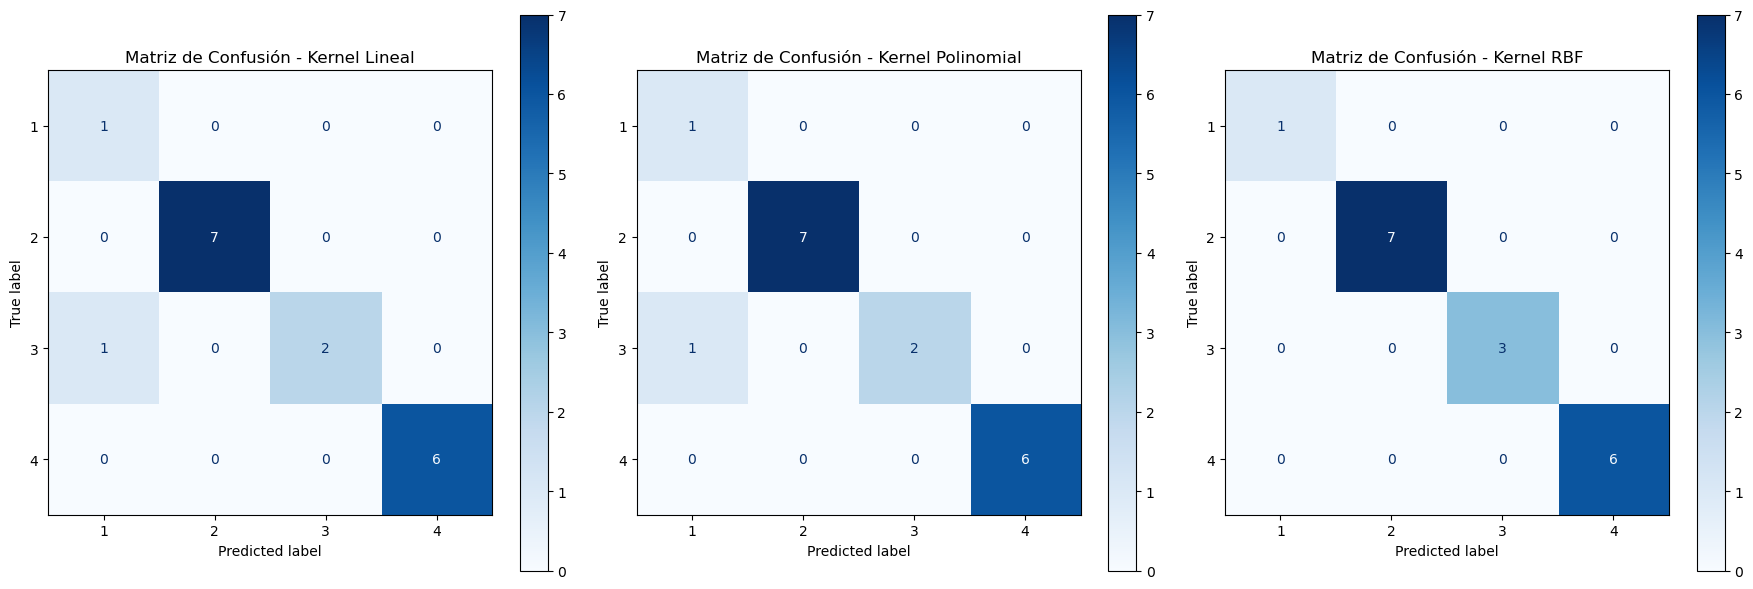

Precisión del modelo SVM con kernel lineal: 0.9412
Precisión del modelo SVM con kernel polinomial (grado 3): 0.9412
Precisión del modelo SVM con kernel radial (RBF): 1.0000


In [28]:
# Importamos las librerías necesarias para la matriz de confusión y la visualización
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculamos la matriz de confusión para cada modelo
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_poly = confusion_matrix(y_test, y_pred_poly)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

# Mostramos las matrices de confusión con su respectiva visualización
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Matriz de confusión para SVM con kernel lineal
disp_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear, display_labels=[1, 2, 3, 4])
disp_linear.plot(ax=ax[0], cmap='Blues')
ax[0].set_title('Matriz de Confusión - Kernel Lineal')

# Matriz de confusión para SVM con kernel polinomial
disp_poly = ConfusionMatrixDisplay(confusion_matrix=cm_poly, display_labels=[1, 2, 3, 4])
disp_poly.plot(ax=ax[1], cmap='Blues')
ax[1].set_title('Matriz de Confusión - Kernel Polinomial')

# Matriz de confusión para SVM con kernel radial
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=[1, 2, 3, 4])
disp_rbf.plot(ax=ax[2], cmap='Blues')
ax[2].set_title('Matriz de Confusión - Kernel RBF')

plt.tight_layout()
plt.show()

# Imprimimos las precisiones para comparar el rendimiento de los modelos
print(f"Precisión del modelo SVM con kernel lineal: {accuracy_linear:.4f}")
print(f"Precisión del modelo SVM con kernel polinomial (grado 3): {accuracy_poly:.4f}")
print(f"Precisión del modelo SVM con kernel radial (RBF): {accuracy_rbf:.4f}")


Esto siguiente solo es para ver en test cuanto habia de cada clase

In [30]:
import numpy as np

# Mostramos cómo se repartieron las muestras de prueba
print("Distribución de muestras en el conjunto de prueba:")
unique_labels, counts = np.unique(y_test, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Clase {label}: {count} muestras")

print(f"Total de muestras de prueba: {len(y_test)}")


Distribución de muestras en el conjunto de prueba:
Clase 1: 1 muestras
Clase 2: 7 muestras
Clase 3: 3 muestras
Clase 4: 6 muestras
Total de muestras de prueba: 17



Conclusión
Para este caso en particular, el kernel radial  fue el mejor, ya que no cometió errores en la clasificación, obteniendo una precisión perfecta de 1.0000 , como se observa en su matriz de confusión, donde todos los elementos se encuentran en la diagonal principal. Esto indica que todas las muestras de prueba fueron clasificadas correctamente. Mientras que , los kernels lineal y polinomial presentaron el mismo  error de clasificación, aunque su precisión también fue alta (0.9412). 

Firma de honor: Doy mi palabra que he realizado esta actividad con integridad académica
En esta tarea se uso GPT, DeepSeek